<a href="https://colab.research.google.com/github/ashisaxena710/Netflix_Movies_and_TV_Shows_Clustering/blob/main/Ashi_Individual_Colab_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows Clustering

# **Problem Statement**


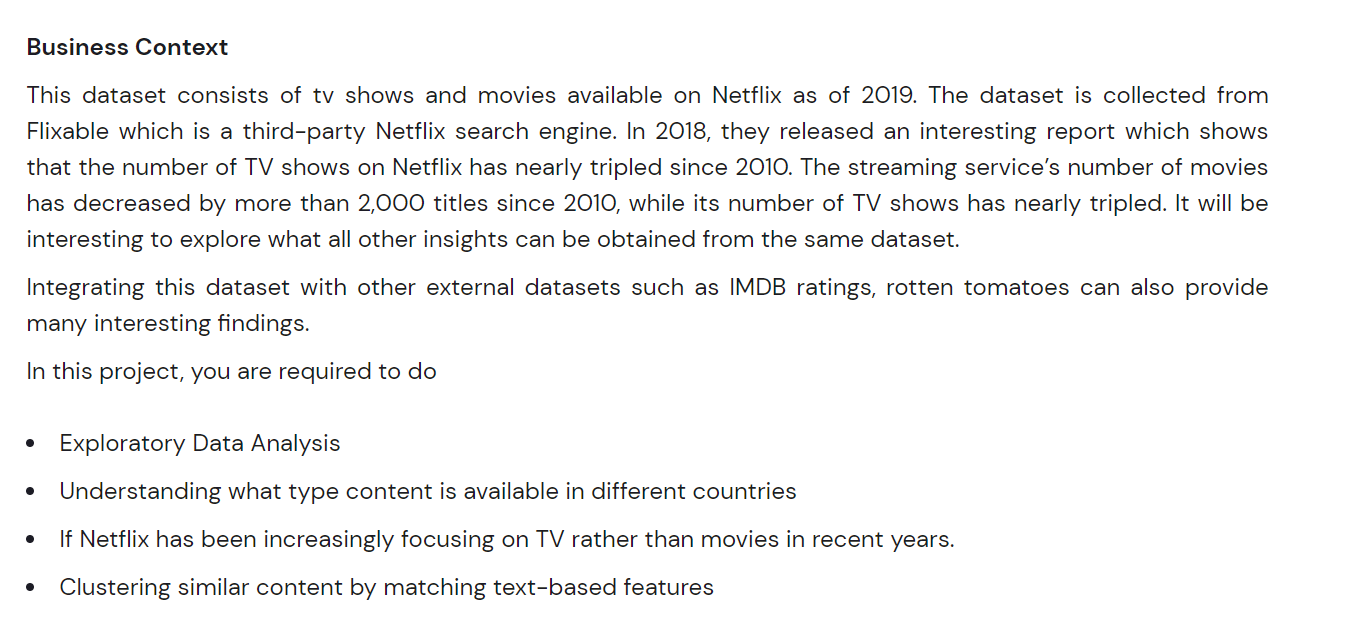

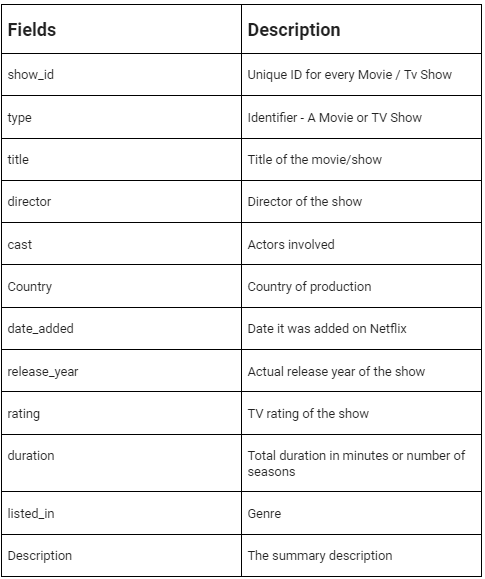

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [351]:
# Import Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from wordcloud import WordCloud, STOPWORDS


import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Dataset Loading

In [241]:
# Load Dataset
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Alma Better/Capstone Project 4/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

### Dataset First View

In [242]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [243]:
# Dataset Rows & Columns count
print(f"The Netflix Movies and TV Shows Clustering dataset contain {df.shape[0]} rows and {df.shape[1]} columns. ")

The Netflix Movies and TV Shows Clustering dataset contain 7787 rows and 12 columns. 


### Dataset Information

In [244]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [245]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

Great, we have no duplicate observations.

#### Missing Values/Null Values

In [246]:
# Missing Values/Null Values Count
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

There exist numerous null values in director, cast, and country column which require attention and resolution. There are few null values in date_added and rating columns.

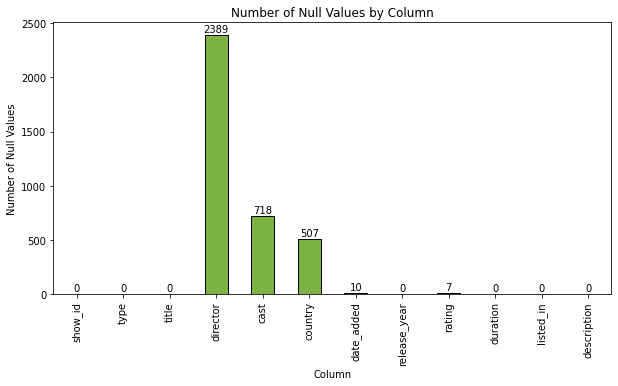

In [247]:
# Visualizing the missing values
# calculate the number of null values in each column
null_counts = df.isnull().sum()

plt.figure(figsize=(10,5))

# create a bar chart of the null counts
ax = null_counts.plot(kind='bar',color='#7cb342',edgecolor='black')

# set the title and axis labels
plt.title('Number of Null Values by Column')
plt.xlabel('Column')
plt.ylabel('Number of Null Values')

# add labels to the bars
for i, v in enumerate(null_counts):
    ax.text(i, v + 30, str(v), color='black', ha='center')

# display the plot
plt.show()

### What did you know about your dataset?

The Netflix Movies and TV Shows Clustering Dataset consists of 12 columns, out of which only one column has an integer data type. The dataset does not contain any duplicate values. However, there are null values present in five columns: director, cast, country, date_added, and rating.

This dataset can be useful for exploring trends in the types of movies and TV shows that are available on Netflix, as well as for developing clustering models to group similar titles together based on shared attributes such as genre, country of origin, and rating.





## ***2. Understanding Your Variables***

In [248]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [249]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description 

The variable description of the Netflix Movies and TV Shows Clustering Dataset is as follows:

1. **show_id**: Unique identifier for each movie/show.

2. **type**: Indicates whether the entry is a movie or a TV show.
3. **title**: Name of the movie or TV show.
4. **director**: Name of the director(s) of the movie or TV show.
5. **cast**: Names of the actors and actresses featured in the movie or TV show.
6. **country**: Country or countries where the movie or TV show was produced.
7. **date_added**: Date when the movie or TV show was added to Netflix.
8. **release_year**: Year when the movie or TV show was released.
9. **rating**: TV rating or movie rating of the movie or TV show.
10. **duration**: Length of the movie or TV show in minutes or seasons.
11. **listed_in**: Categories or genres of the movie or TV show.
12. **description**: Brief synopsis or summary of the movie or TV show.

### Check Unique Values for each variable.

In [250]:
# Check Unique Values for each variable.
print("The unique values for each variables :")
for i in df.columns:
  print(f"\t{i}------{df[i].nunique()}")

The unique values for each variables :
	show_id------7787
	type------2
	title------7787
	director------4049
	cast------6831
	country------681
	date_added------1565
	release_year------73
	rating------14
	duration------216
	listed_in------492
	description------7769


## 3. ***Data Wrangling***

### Data Wrangling Code

In [251]:
# Write your code to make your dataset analysis ready.

###1. Removing unnecessary columns

 We can remove 'show_id' column as this is just a unique identifier for each movie / TV shows and may not be necesarry for clustering and other machine learning tasks.


In [252]:
df.drop('show_id',axis=1,inplace=True)

###2. Handling Missing Values

In [253]:
for i in df.columns:
  if df[i].isna().sum()>0:
    print(f"[{i}]'s null value count : {df[i].isna().sum()}")

[director]'s null value count : 2389
[cast]'s null value count : 718
[country]'s null value count : 507
[date_added]'s null value count : 10
[rating]'s null value count : 7




*   Null values in director and cast column can replaced by 'Unknown'.
*   Null values in country, date_added and rating columns can be replaced by mode value of repective columns.



In [254]:
# Handling missing values
df[['director','cast']]=df[['director','cast']].fillna("Unknown")
df['country']=df['country'].fillna(df['country'].mode()[0])
df['date_added']=df['date_added'].fillna(df['date_added'].mode()[0])
df['rating']=df['rating'].fillna(df['rating'].mode()[0])

###3. Changing Data Types

There are some columns whose datatypes are to be changed :

1.   **release_year**: This column is currently stored as an integer, but we plan to use this column for date-related tasks, so we have to convert it to a datetime format.

2. **date_added**: This column is currently stored as a string, but it contains dates. To use this column for date-related tasks, we need to convert it to a datetime format.




In [255]:
# Converting the 'release_year' column to datetime format
# df['release_year'] = pd.to_datetime(df['release_year'], format='%Y')

# Converting the 'date_added' column to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], infer_datetime_format=True)

### Minimizing the categories in 'rating' column

*Rating column has the following categories* :

**TV-MA**: For Mature Audiences. This rating is intended for adults and may contain explicit content, graphic violence, or strong sexual content.

**TV-14**: For Ages 14 and Up. This rating may contain intense violence, suggestive dialogue, or coarse language.

**TV-PG**: Parental Guidance Suggested. This rating suggests that parents may want to watch with younger children due to mild violence or suggestive content.

**R**: Restricted. This rating indicates that the content is not suitable for children under 17 and may contain adult themes, strong language, and violence.

**PG-13**: Parental Guidance Suggested for Children Under 13. This rating may contain intense violence, sexual content, or strong language.

**TV-Y**: For All Children. This rating is intended for very young children and contains only mild, child-friendly content.

**TV-Y7**: For Ages 7 and Up. This rating may contain mild fantasy violence or some suggestive content.

**PG**: Parental Guidance Suggested. This rating suggests that parents may want to watch with younger children due to mild violence or suggestive content.

**TV-G**: For General Audiences. This rating indicates that the content is suitable for all ages.

**NR**: Not Rated. This rating is given to content that has not been rated by the MPAA or the TV rating system.

**G**: General Audiences. This rating indicates that the content is suitable for all ages.

**TV-Y7-FV**: For Ages 7 and Up with Fantasy Violence. This rating may contain mild fantasy violence or some suggestive content.

**UR**: Unrated. This rating is given to content that has not been rated by the MPAA or the TV rating system.

**NC-17**: No One 17 and Under Admitted. This rating indicates that the content is not suitable for children under 17 and may contain explicit content, graphic violence, or strong sexual content.




We can see that in rating columns there are many categories and there are categories which resemble one another. So we will create 5 categories of rating as follows :

1. Mature Content : 'TV-MA' , 'R' , 'NC-17'

2. Teen and Adult Content : 'TV-14' , 'PG-13' 

3. Family-Friendly Content : 'TV-PG' , 'PG' , 'TV-G' , 'G'

4. Children's Content : 'TV-Y' , 'TV-Y7' , 'TV-Y7-FV'

5. Unrated or Not Applicable : 'NR' , 'UR'

In [256]:
# Changing the values in the rating column
rating_map = {'TV-MA':'Mature Content',
              'R':'Mature Content',
              'PG-13':'Teen and Adult Content',
              'TV-14':'Teen and Adult Content',
              'TV-PG':'Family-Friendly Content',
              'NR':'Unrated or Not Applicable',
              'TV-G':'Family-Friendly Content',
              'TV-Y':"Children's Content",
              'TV-Y7':"Children's Content",
              'PG':'Family-Friendly Content',
              'G':'Family-Friendly Content',
              'NC-17':"Children's Content",
              'TV-Y7-FV':"Children's Content",
              'UR':'Unrated or Not Applicable'}

df['rating'].replace(rating_map, inplace = True)

### What all manipulations have you done and insights you found?

We have performed several data manipulations, including:

1. Removing the show_id column as it did not provide any useful information for our analysis.

2. Handling the missing values in columns director, cast, country, date_added, and rating by either dropping the missing values or filling them with appropriate values.

3. Converting the release_year and date_added columns to the appropriate data type as they were initially stored as strings.

4. Minimizing the rating column to just five categories: 'Mature Content','Teen and Adult Content','Family-Friendly Content',"Children's Content" and 'Unrated or Not Applicable'.
  
Through these manipulations, we have improved the quality of the dataset and made it easier to perform meaningful analysis and draw insights from the 

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

###Chart-1 ( Distribution of Content Types on Netflix )

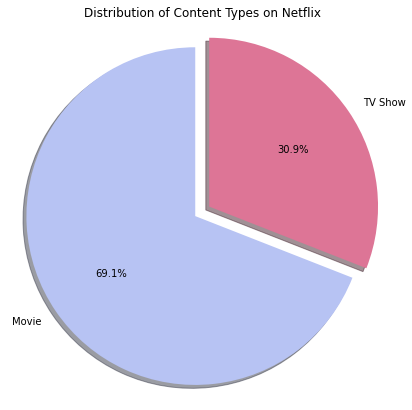

In [258]:
# Create a DataFrame of the count of each unique value in the 'type' column
type_counts = df['type'].value_counts()
plt.figure(figsize=(7,7))
# Create a pie chart of the 'type' column
plt.pie(type_counts, labels=type_counts.index,colors=['#B7C3F3','#DD7596'],explode=(0, 0.1),shadow=True, autopct='%1.1f%%',startangle=90)
plt.title('Distribution of Content Types on Netflix')
plt.axis('equal')
plt.show()

###Chart-2 ( Top 10 directors of Movies and TV Shows on Netflix )

In [259]:
# colors = ['#FFC107', '#03A9F4', '#4CAF50', '#E91E63', '#9C27B0', '#FF9800', '#795548', '#00BCD4', '#8BC34A', '#FF5722']

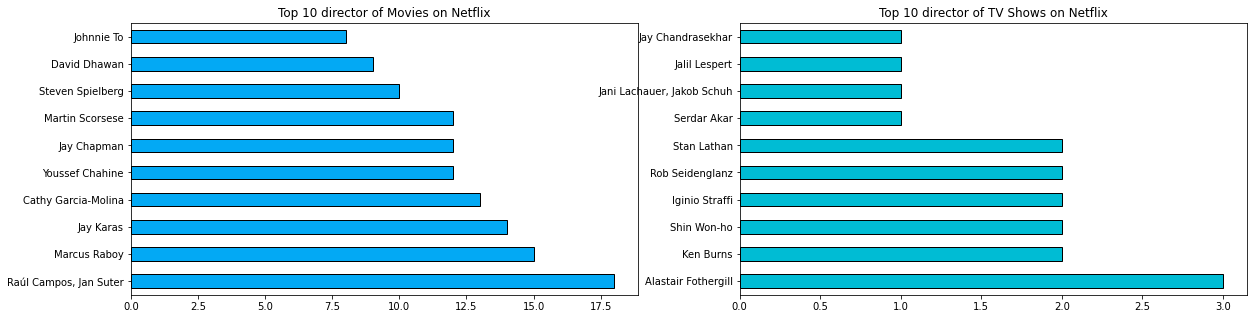

In [260]:
Movies_df=df[df['type']=='Movie']
TV_shows_df=df[df['type']=='TV Show']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

# Plot the top 10 director for movies on Netflix
Movies_df[~(Movies_df['director']=='Unknown')].director.value_counts().nlargest(10).plot(kind='barh', color='#03A9F4', edgecolor='black', ax=ax1)
ax1.set_title('Top 10 director of Movies on Netflix')

# Plot the top 10 director for TV shows on Netflix
TV_shows_df[~(TV_shows_df['director']=='Unknown')].director.value_counts().nlargest(10).plot(kind='barh', color='#00BCD4', edgecolor='black', ax=ax2)
ax2.set_title('Top 10 director of TV Shows on Netflix')

# Display the chart
plt.show()

###Chart-3 ( Top 10 casts of Movies and TV Shows on Netflix )

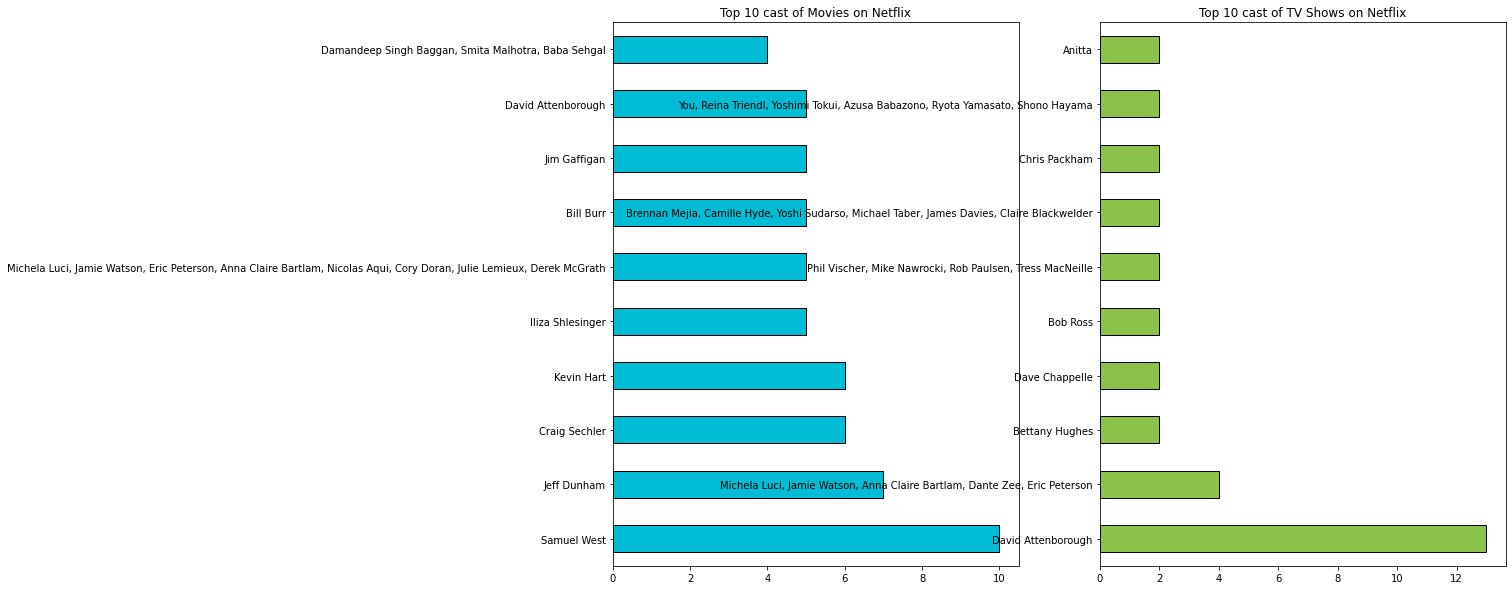

In [261]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,10))

# Plot the top 10 cast for movies on Netflix
Movies_df[~(Movies_df['cast']=='Unknown')].cast.value_counts().nlargest(10).plot(kind='barh', color='#00BCD4', edgecolor='black', ax=ax1)
ax1.set_title('Top 10 casts of Movies on Netflix')

# Plot the top 10 cast for TV shows on Netflix
TV_shows_df[~(TV_shows_df['cast']=='Unknown')].cast.value_counts().nlargest(10).plot(kind='barh', color='#8BC34A', edgecolor='black', ax=ax2)
ax2.set_title('Top 10 casts of TV Shows on Netflix')

# Display the chart
plt.show()

###Chart-4 ( Top 10 countries for Movies and TV Shows on Netflix )

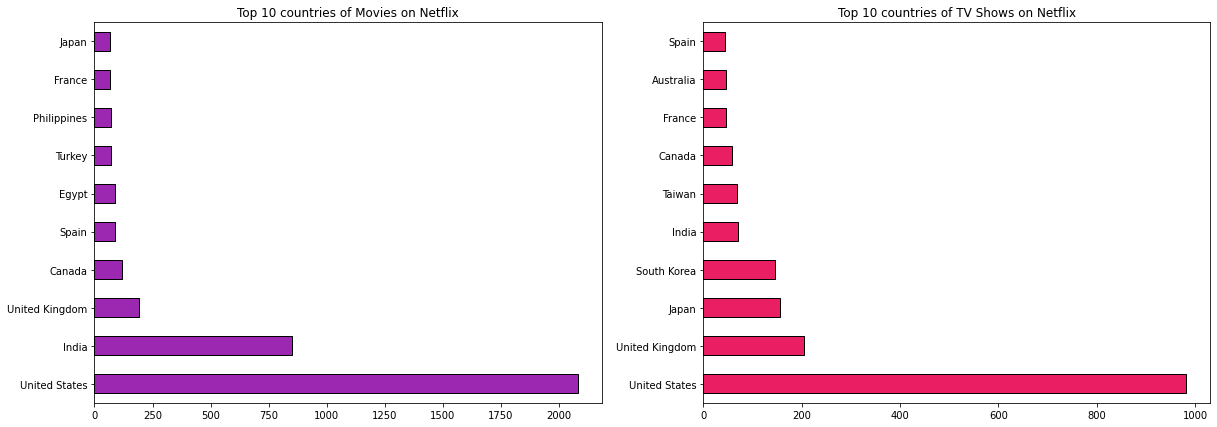

In [262]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

# Plot the top 10 countries for movies on Netflix
Movies_df[~(Movies_df['country']=='Unknown')].country.value_counts().nlargest(10).plot(kind='barh', color='#9C27B0', edgecolor='black', ax=ax1)
ax1.set_title('Top 10 countries of Movies on Netflix')

# Plot the top 10 countries for TV shows on Netflix
TV_shows_df[~(TV_shows_df['country']=='Unknown')].country.value_counts().nlargest(10).plot(kind='barh', color='#E91E63', edgecolor='black', ax=ax2)
ax2.set_title('Top 10 countries of TV Shows on Netflix')

# Display the chart
plt.show()

###Chart-5 ( Number of Movies and TV Shows released on Netflix per year in the last 20 years )

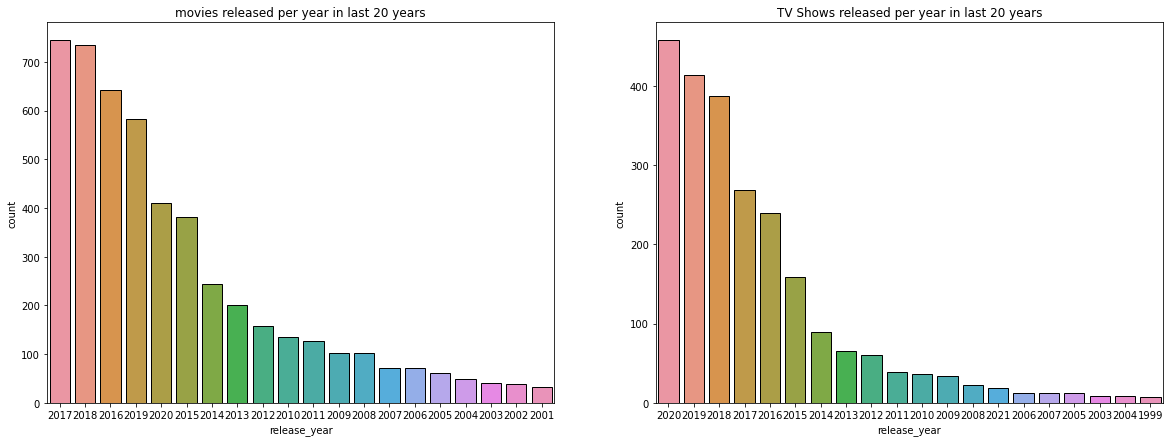

In [331]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

sns.countplot(x=Movies_df['release_year'],data=Movies_df,order=Movies_df['release_year'].value_counts().index[0:20],ax=ax1,edgecolor='black')
ax1.set_title('movies released per year in last 20 years')

sns.countplot(x=TV_shows_df['release_year'],data=TV_shows_df,order=TV_shows_df['release_year'].value_counts().index[0:20],ax=ax2,edgecolor='black')
ax2.set_title('TV Shows released per year in last 20 years')
# Display the chart
plt.show()

###Chart-6 ( Number of Movies and TV Shows added on Netflix per month)

Text(0.5, 1.0, 'Number of Movies and TV Shows added on Netflix per month')

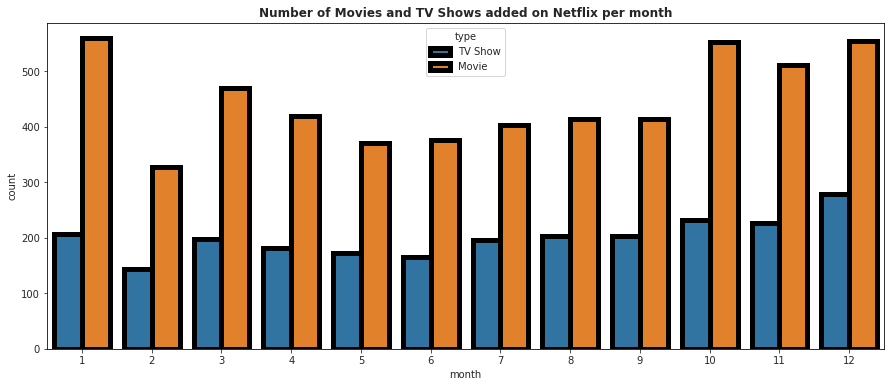

In [357]:
fig, ax = plt.subplots(figsize=(15,6))
df['month'] = pd.DatetimeIndex(df['date_added']).month

sns.countplot(x='month', hue='type',lw=5, data=df, ax=ax,edgecolor='black')
plt.title("Number of Movies and TV Shows added on Netflix per month",fontweight="bold")

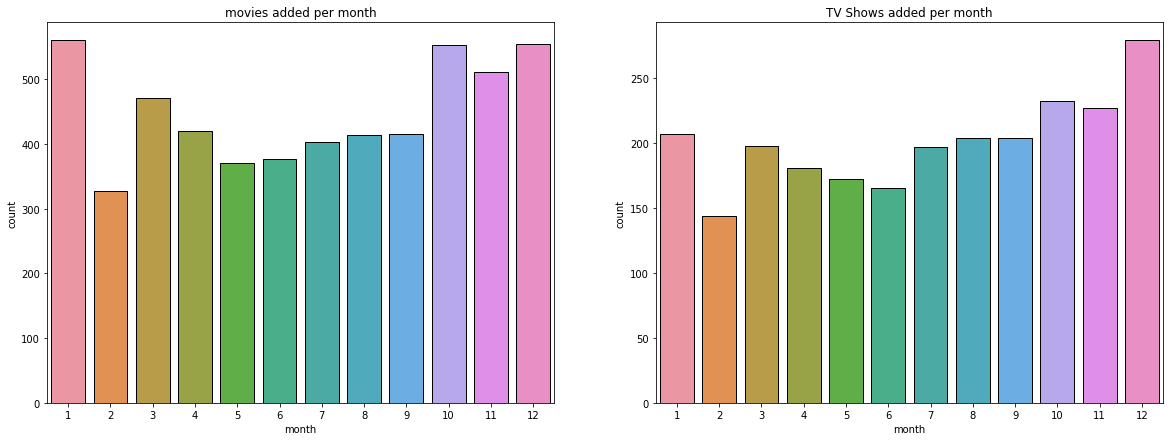

In [334]:
#adding columns of month to Movies and tv_Shows dataframe
Movies_df['month'] = pd.DatetimeIndex(Movies_df['date_added']).month
TV_shows_df['month'] = pd.DatetimeIndex(TV_shows_df['date_added']).month

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

ax=sns.countplot('month',data= Movies_df,ax=ax1,edgecolor='black')
ax1.set_title('movies added per month')

ax=sns.countplot('month',data= TV_shows_df,ax=ax2,edgecolor='black')
ax2.set_title('TV Shows added per month')
# Display the chart
plt.show()

###Chart-7 ( Number of Movies and TV Shows added on Netflix each year)

Text(0.5, 1.0, 'Number of Movies and TV Shows added on Netflix each year')

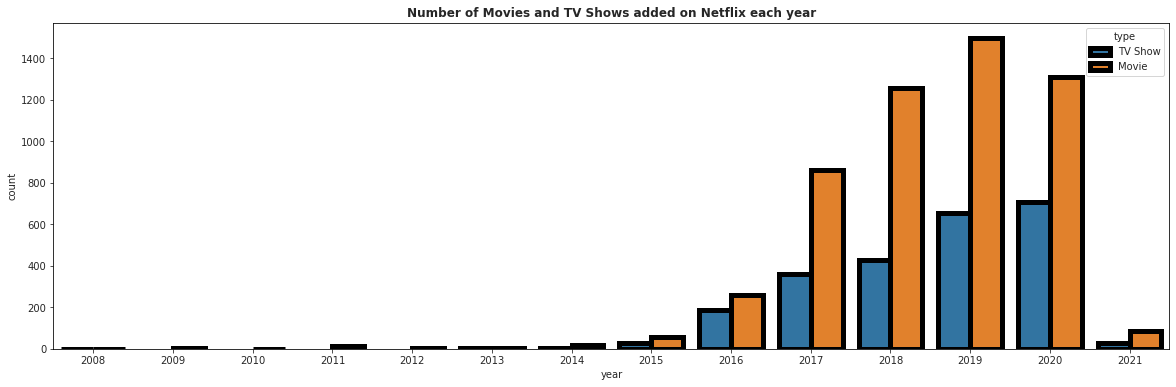

In [358]:
fig, ax = plt.subplots(figsize=(20,6))
df['year'] = pd.DatetimeIndex(df['date_added']).year

sns.countplot(x='year', hue='type',lw=5, data=df, ax=ax,edgecolor='black')
plt.title("Number of Movies and TV Shows added on Netflix each year",fontweight="bold")

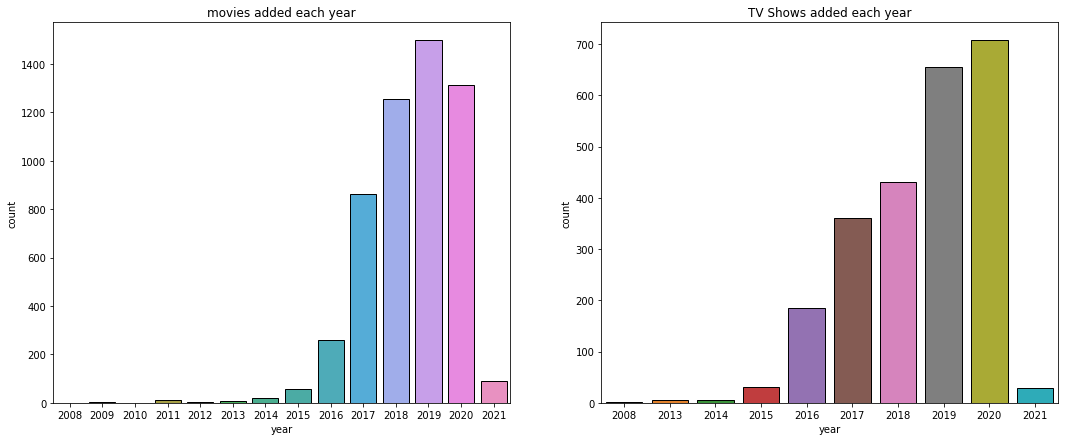

In [335]:
#adding columns of year to Movies and tv_Shows dataframe
Movies_df['year'] = pd.DatetimeIndex(Movies_df['date_added']).year
TV_shows_df['year'] = pd.DatetimeIndex(TV_shows_df['date_added']).year

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

ax=sns.countplot('year',data= Movies_df,ax=ax1,edgecolor='black')
ax1.set_title('movies added each year')

ax=sns.countplot('year',data= TV_shows_df,ax=ax2,edgecolor='black')
ax2.set_title('TV Shows added each year')
# Display the chart
plt.show()

###Chart-8 ( Duration for Movies and TV Shows)

In [266]:
colors = ['#BC5090', '#FF6361', '#FFA600', '#2D728F', '#9970AB', '#009B77', '#D2386C', '#56B4E9', '#8C92AC', '#FFD662']


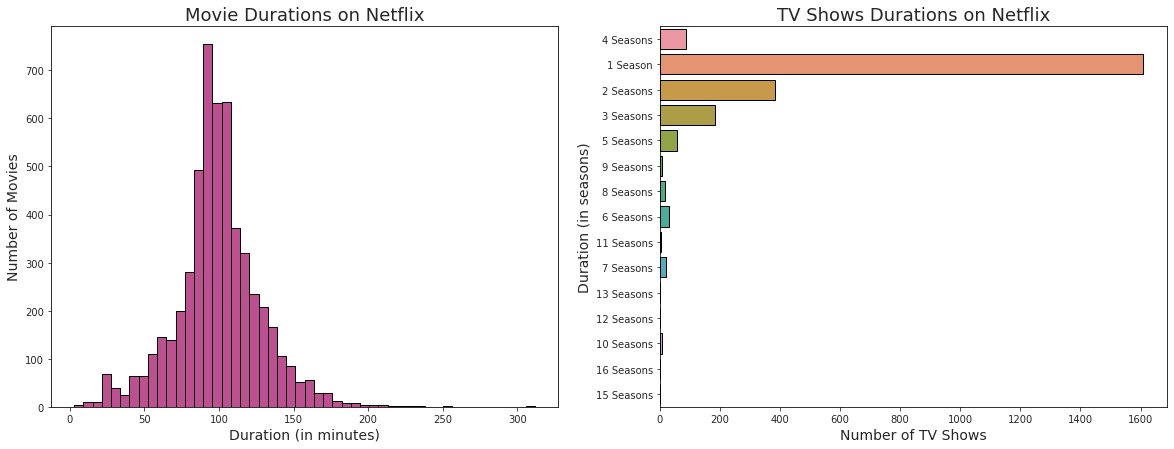

In [362]:
Movies_df = df[df['type'] == 'Movie'].copy()  
Movies_df['duration'] = Movies_df['duration'].str.replace(' min', '').astype(int)
# fig, ax = plt.subplots(figsize=(12, 6))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

ax1.hist(Movies_df.loc[:, 'duration'], bins=50, color='#BC5090', edgecolor='black')
ax1.set_title('Movie Durations on Netflix', fontsize=18)
ax1.set_xlabel('Duration (in minutes)', fontsize=14)
ax1.set_ylabel('Number of Movies', fontsize=14)
print("\t")
Shows_df=df[df["type"]=='TV Show']
# Shows_df['duration'] = Shows_df['duration'].str.replace('Seasons', '').astype(float)
# plt.figure(figsize=(17,5))
sns.countplot(y='duration',data=Shows_df,ax=ax2,edgecolor='black')
plt.title('TV Shows Durations on Netflix', fontsize=18)
plt.ylabel('Duration (in seasons)', fontsize=14)
plt.xlabel('Number of TV Shows', fontsize=14)
plt.show()

###Chart-9 ( Top 10 genres for Movies and TV Shows on Netflix)

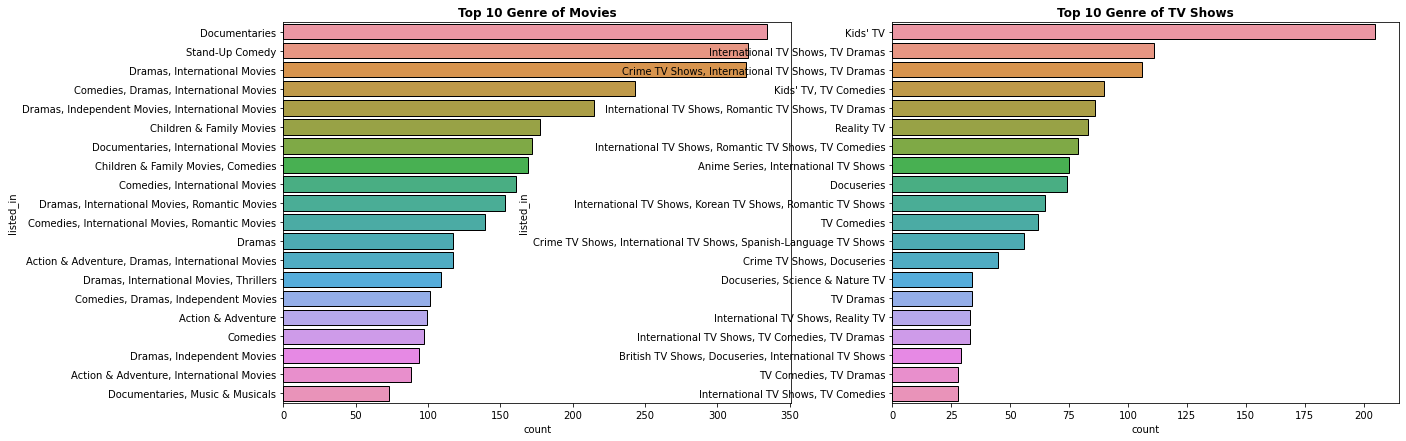

In [337]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

sns.countplot(y=Movies_df['listed_in'],data=Movies_df,order=Movies_df['listed_in'].value_counts().index[0:20],ax=ax1,edgecolor='black')
ax1.set_title('Top 10 Genre of Movies',fontweight="bold")

sns.countplot(y=TV_shows_df['listed_in'],data=TV_shows_df,order=TV_shows_df['listed_in'].value_counts().index[0:20],ax=ax2,edgecolor='black')
ax2.set_title('Top 10 Genre of TV Shows',fontweight="bold")
# Display the chart
plt.show()

##Bivariate Analysis

###Chart-10 ( Have to discuss about this chart )

<BarContainer object of 11 artists>

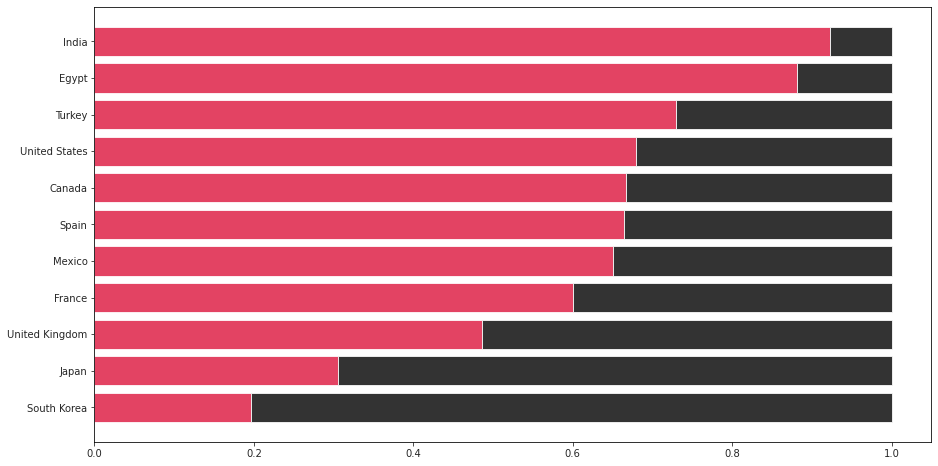

In [345]:
# Plotting the Horizontal bar plot for top 10 country contains Movie & TV Show split
country_order = df['country'].value_counts()[:11].index
content_data = df[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

# Plotting the barh
fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(content_data_ratio.index, content_data_ratio['Movie'], 
        color='crimson', alpha=0.8, label='Movie')
ax.barh(content_data_ratio.index, content_data_ratio['TV Show'], left=content_data_ratio['Movie'], 
        color='black', alpha=0.8, label='TV Show')

###Chart-11 ( Top 15 countries with most contents on netflix)

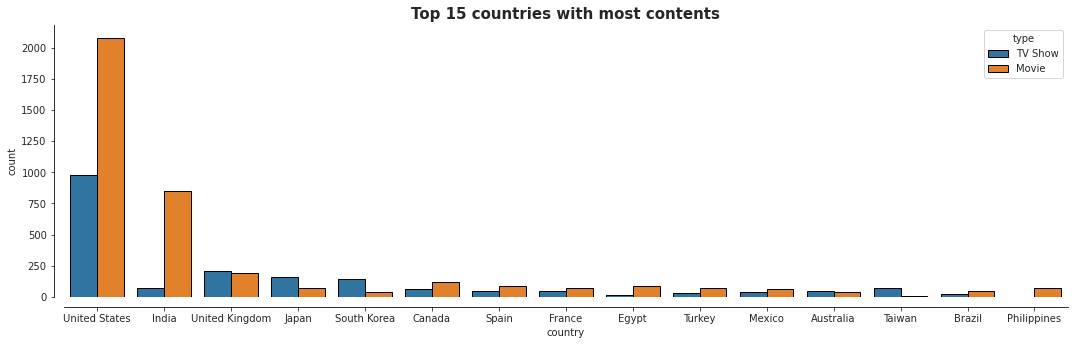

In [344]:
plt.figure(figsize=(18,5))
sns.countplot(x=df['country'], order=df['country'].value_counts().index[0:15], hue=df['type'], edgecolor='black')
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')

# Remove the top and right spines
sns.despine(offset={'left': 10, 'bottom': 10})

plt.show()


###Chart-11 (Netflix Originals)

Some movies and TV shows were actually released in the past and they were added 
later on Netflix.
But some movies and TV shows were released on Netflix itself. Named those as Netflix Originals.

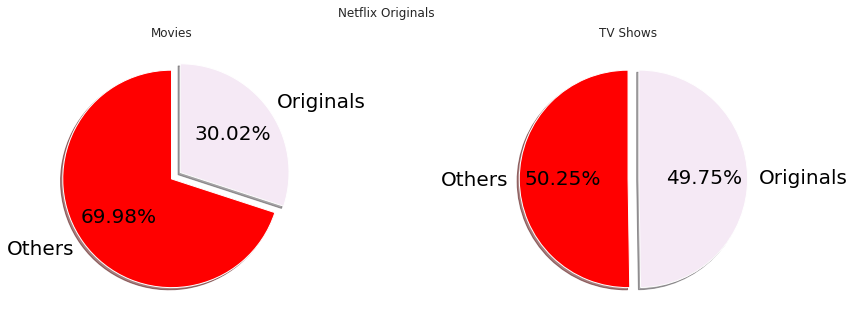

In [355]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot pie chart for movies on the first subplot
explode = (0, 0.1)
ax1.pie(Movies_df['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"black", 'fontsize': 20}, colors =['red','#F5E9F5'])
ax1.set_title('Movies')

# Plot pie chart for TV shows on the second subplot
explode = (0, 0.1)
ax2.pie(TV_shows_df['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"black", 'fontsize': 20}, colors =['red','#F5E9F5'])
ax2.set_title('TV Shows')

# Set the title for the entire figure
fig.suptitle('Netflix Originals')

# Show the plot
plt.show()


Approximately 30% of the movies available on Netflix are originals while the remaining 70% were released earlier by different modes. Also about 50% of the TV shows available on Netflix are originals while the other 50% were released earlier by different modes.

###Chart-11 (Wordcloud for Description)

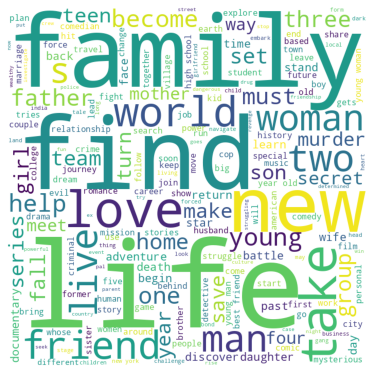

In [352]:
# Building a wordcloud for the descriptions
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.description.values:
    
    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()
    
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


# plot the WordCloud image                      
plt.figure(figsize = (10,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 

Some keywords in Netflix show descriptions: life, find, family, new, love, young, world, group, death, man, woman, murder, son, girl, documentary, secret.


#### Chart - 14 - Correlation Heatmap

In [282]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [283]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [284]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [285]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [286]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [287]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [288]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [289]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [290]:
# Expand Contraction

#### 2. Lower Casing

In [291]:
# Lower Casing

#### 3. Removing Punctuations

In [292]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [293]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [294]:
# Remove Stopwords

In [295]:
# Remove White spaces

#### 6. Rephrase Text

In [296]:
# Rephrase Text

#### 7. Tokenization

In [297]:
# Tokenization

#### 8. Text Normalization

In [298]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [299]:
# POS Taging

#### 10. Text Vectorization

In [300]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [301]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [302]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [303]:
# Transform Your data

### 6. Data Scaling

In [304]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [305]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [306]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [307]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [308]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [309]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [310]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [311]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [312]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [313]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [314]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [315]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [316]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [317]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***